# 1. Data Generation  (Preparation)

Linear Regression 실습에 사용할 공부한 시간에 따른 성적 데이터

In [1]:
X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  #공부한시간 X / 간단한식 ->  X=list(range(10))
Y = [1, 1, 2, 4, 5, 7, 8, 9, 9, 10]  #성적데이터 Y  

X, Y 데이터를 2D 평면 상에 시각화

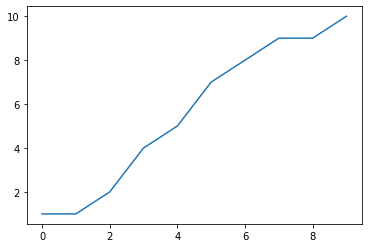

In [2]:
import matplotlib.pyplot as plt
plt.plot(X, Y)  #plt.plot X와 Y값을 가지고 line그래프 그리기

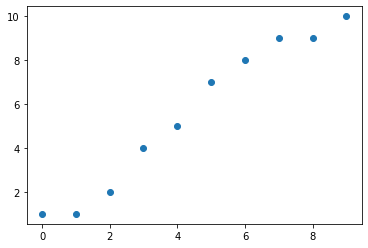

In [3]:
plt.scatter(X, Y)  #plt.scatter X와 Y값을 가지고 점 그리기
plt.show()

# 2. Hypothesis Define (Model Define)  

Linear Regression 시에 활용하는 f(x) = Wx + b에서
b가 없는 간단한 버전인 f(x) = Wx 라는 모델(가설) 구현

In [4]:
class H():
    def __init__(self, w):  #처음에 모델의 파라미터(학습을 통해 최적화될 값) w를 input(인자)으로 받아 모델을 만듦.
        self.w = w  #H의 내부에 w라는 변수에 input으로 받은 w를 넣겠다.라는 의미
    
    def forward(self, x):  #pytorch는 h(x)를 통과시킬때 forward라는 함수를 사용 // 인스턴스(샘플) x가 인풋으로 들어왔을 때 모델이 예측하는 y값을 리턴
        return self.w * x  #y
    
h = H(4)  #f(x) = 4x 라는 모델이 만들어짐
pred_y = h.forward(5)  #x=5 라는 인스턴스(샘플)이 input으로 들어왔을 때 f(5) = 4 x 5 를 통해서 20 이 정상적으로 출력되는 것을 확인

print('value of f(5) :', pred_y)  #4*5=20  
print('value of w :', h.w)  #모델 h의 내부 파라미터를 출력했을 때 4가 정상적으로 출력되는 것도 확인.

value of f(5) : 20
value of w : 4


# 3. Cost Function Define (Loss Function Define)  

Regression Problem 에서의 Cost Function을 작성.(앞서 만든 hypothesis가 얼마나 좋고 혹은 나쁜지 판단하기 위한..cost function)

In [5]:
def cost(h, X, Y):  #cost function
    error = 0  #error 0으로 초기화
    for i in range(len(X)):  #len(X):x의 길이만큼.
        error += (h.forward(X[i]) - Y[i])**2  #h(x)-true_y 한것의 제곱을 error에 더함.
    error = error / len(X)  #error를 x의 길이로 나눠주어 "평균"을 구함
    return error

h = H(4)  #위에서 이미 생성했지만 다시 생성.
print('cost value when w = 4 :', cost(h, X, Y)) #f(x) = 4x 인 현재의 모델은 우리가 관측한 데이터셋에 대해서 222.2 라는 cost를 가짐. (상당히 큰 값)

cost value when w = 4 : 222.2


In [6]:
  #아래코드가 위 코드보다 조금 더 나은 버전
  #위에 있는 cost(h, X, Y)에서는 cost function 안에서 H(x)를 계산해야 하는 불편함이 있기 때문에
  #일반적으로 코드를 짤 때 cost function(loss function)들은 모델이 예측한 y 값들의 리스트와 실제 y 값들의 리스트만 받아서 계산하는 구조를 취함.
  
def better_cost(pred_y, true_y):  #모델이 예측한 y값, 실제 y값
    error = 0
    for i in range(len(X)):  #len(X):x의 길이만큼.
        error += (pred_y[i] - true_y[i])**2  #pred_y-true_y 한것의 제곱을 error에 더함.
    error = error / len(X)
    return error

pred_y = [ h.forward(X[i]) for i in range(len(X)) ] #미리 모델 h를 통해서 각 x 인스턴스에 대한 y 값을 예측.
print('cost value with better code structure :', better_cost(pred_y, Y)) #위와 똑같이 222.2 라는 값이 나오는 것을 확인.

cost value with better code structure : 222.2


### Cost Surface Visualization 


*   위에서 w=4 인 경우에 대해서 cost를 확인.

*   이번엔 다양한 w에 따라서 cost 값이 어떻게 바뀌는지 확인



[-10.0, -9.9, -9.8, -9.700000000000001, -9.600000000000001, -9.5, -9.4, -9.3, -9.200000000000001, -9.1, -9.0, -8.9, -8.8, -8.700000000000001, -8.6, -8.5, -8.4, -8.3, -8.200000000000001, -8.1, -8.0, -7.9, -7.800000000000001, -7.7, -7.6000000000000005, -7.5, -7.4, -7.300000000000001, -7.2, -7.1000000000000005, -7.0, -6.9, -6.800000000000001, -6.7, -6.6000000000000005, -6.5, -6.4, -6.300000000000001, -6.2, -6.1000000000000005, -6.0, -5.9, -5.800000000000001, -5.7, -5.6000000000000005, -5.5, -5.4, -5.300000000000001, -5.2, -5.1000000000000005, -5.0, -4.9, -4.800000000000001, -4.7, -4.6000000000000005, -4.5, -4.4, -4.3, -4.2, -4.1000000000000005, -4.0, -3.9000000000000004, -3.8000000000000003, -3.7, -3.6, -3.5, -3.4000000000000004, -3.3000000000000003, -3.2, -3.1, -3.0, -2.9000000000000004, -2.8000000000000003, -2.7, -2.6, -2.5, -2.4000000000000004, -2.3000000000000003, -2.2, -2.1, -2.0, -1.9000000000000001, -1.8, -1.7000000000000002, -1.6, -1.5, -1.4000000000000001, -1.3, -1.20000000000000

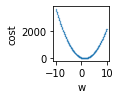

In [7]:
#강의내용
list_w = []  #weight값 담을 리스트
list_c = []  #cost값 담을 리스트
for i in range(-100, 100):
    w = i * 0.1
    h = H(w)
    c = cost(h, X, Y)
    list_w.append(w)
    list_c.append(c)
    
print(list_w)  #w값 print
print(list_c)  #c값 print

plt.figure(figsize=(1,1))
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w, list_c, s=0.1)



*   range(-100,100)->0.1을 곱했기 때문에 w의 범위 (-10~10)




[-10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]
[3582.2, 3269.825, 2971.7, 2687.825, 2418.2, 2162.825, 1921.7, 1694.825, 1482.2, 1283.825, 1099.7, 929.825, 774.2, 632.825, 505.7, 392.825, 294.2, 209.825, 139.7, 83.825, 42.2, 14.825, 1.7, 2.825, 18.2, 47.825, 91.7, 149.825, 222.2, 308.825, 409.7, 524.825, 654.2, 797.825, 955.7, 1127.825, 1314.2, 1514.825, 1729.7, 1958.825]


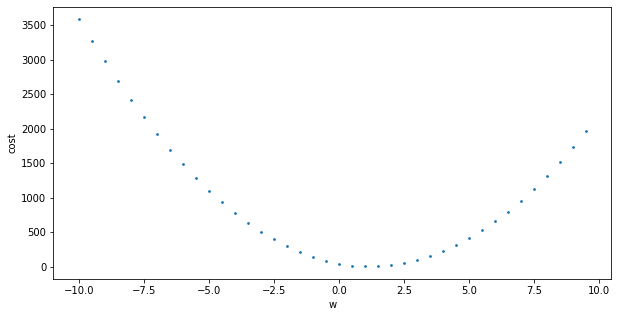

In [8]:
#수업자료
list_w = []  #weight값 담을 리스트
list_c = []  #cost값 담을 리스트
for i in range(-20, 20):
    w = i * 0.5
    h = H(w)
    c = cost(h, X, Y)
    list_w.append(w)
    list_c.append(c)
    
print(list_w) #w값 print
print(list_c) #c값 print

plt.figure(figsize=(10,5))
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w, list_c, s=3)

*   range(-20,20)->0.5를 곱했기 때문에 w의 범위 (-10~10)
*   w = 1.25 정도 쯤에서 cost 값이 최소가 되는 듯한 양상

**여기까지는 시각화 연습->이제 "학습"을 시켜볼 것이다.**

# Gradient Descent Algorithm  

이제 특정 w 근방에서의 w에 대한 cost 의 편미분(지금은 변수가 하나라 그냥 미분과 다를바 없지만)을 구해보자 

두가지 방식으로 gradient를 구하기. 


1.수치해석적

w=4 인 지점과 w=4 + eps 인 지점에서의 cost 값을 각각 구한 뒤 두 값의 차이를 통해 그라이디언트를 구하는 방식.

2.편미분 공식에 바로대입

cost function을 w로 편미분한 공식을 통해 바로 특정 w 에서의 그라디언트를 구하는 방식.

### Compare two approach in order to compute Gradient (Analytic, Formula)

cost를 줄이기 위해서 gradient의 반대방향으로 파라미터들을 바꿔줌

In [9]:
#--------------- 1.수치해석적으로 Gradient를 근사 ---------------
def cal_grad(w, cost): #cost는 값이 아니라 cost를 계산하는 함수를 넣어준것(위에서 만든)
    h = H(w)  #가설을 만듦 **cost1의 h와 cost2의 h는 다름을 명심
    cost1 = cost(h, X, Y)  #cost1=w에서의 cost
  
    eps = 0.00001  #eps = epsilon(임의의 매우작은양수),cost1과 차이를 두기 위함. 
    h = H(w+eps)  #w에서 eps만큼 떨어진 부분에서도 cost를 구해줌.
    cost2 = cost(h, X, Y)  #cost2=w+eps 에서의 cost
    dcost = cost2 - cost1  #cost2-cost1 한값 dcost를 
    dw = eps
    grad = dcost / dw  #eps(=dw) 값으로 나누어주면 미분값에 근사한게 나옴
    return grad

#--------------- 실험1.w=4일때 ---------------
w = 4
lr =0.001
print(cal_grad(4,cost))  #w=4인 지점에서는,w가 증가하면 cost도 증가. 즉 cost를 낮추려면 -> w를 낮춰야함

w = w + lr * (-cal_grad(4,cost))  #그래서 cal_grad ->부호 마이너스를 취함
print(w)

159.00028499515884
3.840999715004841


In [10]:
#--------------- 1.수치해석적으로 Gradient를 근사 ---------------
def cal_grad(w, cost): #cost는 값이 아니라 cost를 계산하는 함수를 넣어준것(위에서 만든)
    h = H(w)  #가설을 만듦 **cost1의 h와 cost2의 h는 다름을 명심
    cost1 = cost(h, X, Y)  #cost1=w에서의 cost
  
    eps = 0.00001  #eps = epsilon(임의의 매우작은양수),cost1과 차이를 두기 위함. 
    h = H(w+eps)  #w에서 eps만큼 떨어진 부분에서도 cost를 구해줌.
    cost2 = cost(h, X, Y)  #cost2=w+eps 에서의 cost
    dcost = cost2 - cost1  #cost2-cost1 한값 dcost를 
    dw = eps
    grad = dcost / dw  #eps(=dw) 값으로 나누어주면 미분값에 근사한게 나옴
    return grad, (cost1 +cost2)*0.5

#--------------- 실험2 cost값 return ,lr=0.01,range 10 ---------------
w = 4
lr =0.01  #0.001 ->0.01로 변경

for i in range(10):
  grad,mean_cost = cal_grad(w,cost)
  w -= lr * grad
  print(w, mean_cost)  #cost가 처음에 222였는데 약 0.43까지 줄어드는 것을 확인

2.4099971500484116 222.20079500142498
1.7262959245152274 41.44099699965416
1.4323043975399372 8.018510345652484
1.3058880409413351 1.8386925634715428
1.251529007604498 0.6960442555620926
1.2281546232699134 0.48476858343354434
1.2181036380061148 0.44570371165760025
1.2137817143426064 0.43848061686627154
1.211923287167068 0.43714506663932806
1.2111241634819545 0.4368981234023502


1.2105213157896242 0.43684210597565787 1.2105263157894737 0.43684210526315803


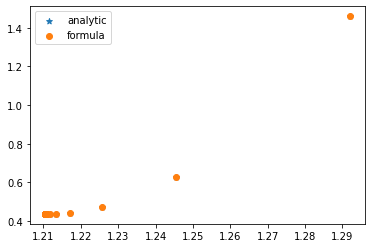

In [11]:
#--------------- 1.수치해석적으로 Gradient를 근사 ---------------
def cal_grad(w, cost): #1.cost는 값이 아니라 cost를 계산하는 함수를 넣어준것(위에서 만든)
    h = H(w)  #가설을 만듦 **cost1의 h와 cost2의 h는 다름을 명심
    cost1 = cost(h, X, Y)  #cost1=w에서의 cost
    
    eps = 0.00001 
    h = H(w+eps)  #w에서 epsilon(임의의 매우작은양수) 만큼 떨어진 부분에서도 cost를 구해줍니다.
    cost2 = cost(h, X, Y)  #cost2=w+eps 에서의 cost
    dcost = cost2 - cost1  #cost2-cost1 한값 dcost를 
    dw = eps
    grad = dcost / dw  #eps(=dw) 값으로 나누어주면 미분값에 근사한게 나옴
    return grad, (cost1+cost2)*0.5

#--------------- 2.편미분한 공식에 바로 대입하여 Gradient를 근사 ---------------
def cal_grad2(w, cost): 
    h = H(w)
    grad = 0
    for i in range(len(X)):
        grad += 2 * (h.forward(X[i]) - Y[i]) * X[i]
    grad = grad / len(X)
    c = cost(h, X, Y)
    return grad, c

#두 방식을 이용해서 w = 1.4 라는 지점에서 모델을 각각 초기화한 뒤에 Gradient Descent Algorithm 을 통해 내려갔을 때 거의 같은 결과가 나오는지 확인.
w1 = 1.4  #w 1.4로 동일
w2 = 1.4  #w 1.4로 동일
lr = 0.01  #학습률 0.01로 동일

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

for i in range(100):  #총 100번의 Iteration(반복)을 통해서 학습진행.
    grad, mean_cost = cal_grad(w1, cost)
    grad2, mean_cost2 = cal_grad2(w2, cost)

    w1 -= lr * grad
    w2 -= lr * grad2
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost)
    list_c2.append(mean_cost2)
    
print(w1, mean_cost, w2, mean_cost2) #100번의 학습이 끝난 뒤 w1,w2 출력->둘다 1.21 정도로 비슷한 값으로 수렴한 것을 확인.
  
#매 Iteration에서의 w 값과 cost 값을 그래프 상에 찍어보면 둘이 거의 정확하게 같은 지점을 통과하므로 동그라미가 별표를 가림
plt.scatter(list_w1, list_c1, label='analytic', marker='*')
plt.scatter(list_w2, list_c2, label='formula')
plt.legend()

### Compare Training process of Two Models Initialized from Different w value

1.2105263157894737 0.43684210526315803 1.2105263157894737 0.43684210526315803


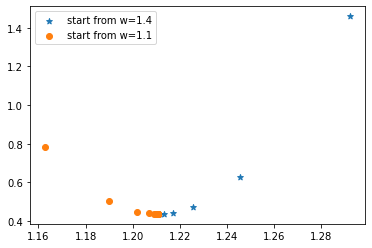

In [12]:
#편미분 공식 활용해 Gradient Descent 진행. 서로 다른 w 지점으로 초기화 되었을 때 학습 양상을 확인.
w1 = 1.4  #w가 1.4일때
w2 = 1.1  #w가 1.1일때
lr = 0.01  #학습률 0.01로 동일

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

for i in range(100):  #총 100번의 Iteration(반복)을 통해서 학습진행.
    grad, mean_cost = cal_grad2(w1, cost)
    grad2, mean_cost2 = cal_grad2(w2, cost)

    w1 -= lr * grad
    w2 -= lr * grad2
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost)
    list_c2.append(mean_cost2)
    
print(w1, mean_cost, w2, mean_cost2) #100번의 학습이 끝난 뒤에 w1 과 w2 를 출력해보니 둘다 1.21 정도로 비슷한 값으로 수렴 확인.
  
#서로 다른 지점으로부터 시작하였더라도 학습이 진행됨에 따라 둘 다 같은 파라미터(w=1.21)로 수렴하는 양상 확인.
plt.scatter(list_w1, list_c1, label='start from w=1.4', marker='*')
plt.scatter(list_w2, list_c2, label='start from w=1.1')
plt.legend()